<a href="https://colab.research.google.com/github/Benjamin-compute/Financial-Crises-Analysis-of-Major-Bank-Stocks/blob/main/Financial_Crisis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This is strictly exploratory data analysis, minimal predictions and not a financial advice :)


> Focus will be on bank stocks and seeing how they progressed throughout the financial crises (2008) up to early 2016.

> More context: Linked [here](https://en.wikipedia.org/wiki/2008_financial_crisis#:~:text=External%20links-,2008%20financial%20crisis,-69%20languages)

> Data: Reading stocks information directly from the internet (Yahoo Finance) for the following banks:
* Bank of America
* Citi Group
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo





In [ ]:
# Import relevant libraries

from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import pandas_datareader.data as web
import seaborn as sns
import matplotlib.pyplot as plt


import yfinance as yf
%matplotlib inline

In [ ]:
# timeframe under consideration

start_date = datetime.datetime(2006, 1, 1)
end_date = datetime.datetime(2016, 1, 1)

In [ ]:
# ticker symbols for each bank

bank_tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

## Get data

In [ ]:
BAC = yf.download(bank_tickers[0], start=start_date, end=end_date)
C = yf.download(bank_tickers[1], start=start_date, end=end_date)
GS = yf.download(bank_tickers[2], start=start_date, end=end_date)
JPM = yf.download(bank_tickers[3], start=start_date, end=end_date)
MS = yf.download(bank_tickers[4], start=start_date, end=end_date)
WFC = yf.download(bank_tickers[5], start=start_date, end=end_date)


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


## Join data into one dataframe

In [ ]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC],
                       # keys = bank_tickers,
                        axis = 1,
                        names= ['Stock Info', 'Bank Ticker'])

bank_stocks.head()

Price,Close,High,Low,Open,Volume,Close,High,Low,Open,Volume,...,Close,High,Low,Open,Volume,Close,High,Low,Open,Volume
Ticker,BAC,BAC,BAC,BAC,BAC,C,C,C,C,C,...,MS,MS,MS,MS,MS,WFC,WFC,WFC,WFC,WFC
Date,,,,,,,,,,,,,,,,,,,,,
2006-01-03,30.991064,31.056889,30.378878,30.885739,16296700,321.442841,322.029768,313.747524,319.551621,1537600,...,31.934685,32.033266,31.074842,31.310338,5377000,18.675657,18.719566,18.262919,18.500025,11016400
2006-01-04,30.661924,31.096378,30.576349,30.938394,17757900,315.508057,320.203513,315.312421,318.638368,1870960,...,31.956589,32.465923,31.956589,32.148275,7977800,18.459032,18.628810,18.362433,18.617101,10870000
2006-01-05,30.701401,30.826472,30.490757,30.661907,14970700,317.073273,318.116690,315.638544,315.899398,1143160,...,32.044205,32.088019,31.775847,32.066112,5778000,18.438547,18.473673,18.330239,18.441474,10158000
2006-01-06,30.655338,30.879148,30.510519,30.806739,12599800,317.073273,318.899273,314.334253,318.768836,1370210,...,32.077065,32.230412,31.792276,32.186599,6889800,18.546856,18.602473,18.374150,18.488311,8403800
2006-01-09,30.675074,30.918633,30.517092,30.754067,15619400,315.573303,317.855813,314.986376,316.942813,1680740,...,32.416630,32.471398,32.104458,32.109936,4144500,18.543928,18.631746,18.473676,18.543928,5619600


In [ ]:
# Rename columns

bank_stocks.columns.names = ['Stock Info', 'Bank Ticker']

In [ ]:
bank_stocks.head()

Stock Info,Close,High,Low,Open,Volume,Close,High,Low,Open,Volume,...,Close,High,Low,Open,Volume,Close,High,Low,Open,Volume
Bank Ticker,BAC,BAC,BAC,BAC,BAC,C,C,C,C,C,...,MS,MS,MS,MS,MS,WFC,WFC,WFC,WFC,WFC
Date,,,,,,,,,,,,,,,,,,,,,
2006-01-03,30.991064,31.056889,30.378878,30.885739,16296700,321.442841,322.029768,313.747524,319.551621,1537600,...,31.934685,32.033266,31.074842,31.310338,5377000,18.675657,18.719566,18.262919,18.500025,11016400
2006-01-04,30.661924,31.096378,30.576349,30.938394,17757900,315.508057,320.203513,315.312421,318.638368,1870960,...,31.956589,32.465923,31.956589,32.148275,7977800,18.459032,18.628810,18.362433,18.617101,10870000
2006-01-05,30.701401,30.826472,30.490757,30.661907,14970700,317.073273,318.116690,315.638544,315.899398,1143160,...,32.044205,32.088019,31.775847,32.066112,5778000,18.438547,18.473673,18.330239,18.441474,10158000
2006-01-06,30.655338,30.879148,30.510519,30.806739,12599800,317.073273,318.899273,314.334253,318.768836,1370210,...,32.077065,32.230412,31.792276,32.186599,6889800,18.546856,18.602473,18.374150,18.488311,8403800
2006-01-09,30.675074,30.918633,30.517092,30.754067,15619400,315.573303,317.855813,314.986376,316.942813,1680740,...,32.416630,32.471398,32.104458,32.109936,4144500,18.543928,18.631746,18.473676,18.543928,5619600


## Data Size

In [ ]:
n = len(bank_stocks)
df_len = "{:,}".format(n)

print(df_len)

2,517


In [ ]:
bank_stocks.shape

(2517, 30)

## Note:
* Clearly, our data is a [MultiIndex](https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html) dataframe
* Our approach to analysis will be slightly different (vs. single index) dataframe

# What is the maximum Closing price for each bank's stock, throughout the 10years of study?
* Here the .xs( ) [method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.xs.html) is used

In [ ]:
bank_stocks.xs(key = 'Close',
               axis = 1,
               level = 'Stock Info').max()

,0
Bank Ticker,
BAC,37.478725
C,383.228302
GS,185.153259
JPM,53.603733
MS,50.061150
WFC,44.026573


In [ ]:
#a little more overall exploration of the .xs() method

bank_stocks.xs(key = 'Close',
               axis = 1,
               level = 'Stock Info')

Bank Ticker,BAC,C,GS,JPM,MS,WFC
Date,,,,,,
2006-01-03,30.991064,321.442841,94.820450,24.093306,31.934685,18.675657
2006-01-04,30.661924,315.508057,93.510780,23.954256,31.956589,18.459032
2006-01-05,30.701401,317.073273,93.474007,24.026806,32.044205,18.438547
2006-01-06,30.655338,317.073273,94.798416,24.196091,32.077065,18.546856
2006-01-09,30.675074,315.573303,95.938858,24.589075,32.416630,18.543928
...,...,...,...,...,...,...
2015-12-24,14.020792,39.868534,150.243637,51.309467,24.789007,41.797512
2015-12-28,13.907134,39.618935,149.543747,51.139988,24.552412,41.690765
2015-12-29,14.028914,40.072754,151.116440,51.671555,24.842430,42.155853


# Calculate the "return" for each bank's stock
* return formula:  $$ r_t = \frac{ p_t - p_{t-1} }  { p_{t-1} } = \frac{p_t}{p_{t-1}} - 1$$
* where
  * $ p_t $ : current value
  * $p_{t-1}$ : original value
  * $r_t$ : return per time  
* Here, we use the 'Close' column to create a new column representing the return value
* This is used to create a new dataframe, called 'return'
* `To verify` our calculation, we use the `pct_method( )` in python. Method is (percentage change w/o *100): [pct_change( )](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pct_change.html)


In [ ]:
# Pull the 'close' column data
Close = bank_stocks.xs(key = 'Close',
               axis = 1,
               level = 'Stock Info')


# Get each bank name (Bank ticker): needed to create calculation for each bank
for bank_name in Close.columns:

  # do the calculation for each column
  bank = Close[bank_name]

  r = []  # store calculated results
  for value in range(0, len(bank)):
    # set base case
    if value == 0:
      r.append(np.nan)  # save result as NaN since we cannot use the formula for first row/ first number

    else:
      formula = (bank.iloc[value] - bank.iloc[value - 1] ) / bank.iloc[value -1 ]
      r.append(formula)
  Close[bank_name + " " + 'return'] = r


# Save the new columns into a new dataframe
return_t = Close.filter(like='return', axis=1)   # not hardcoding the column names, make the code flexible perhaps we chose to work on different or other banks/ companies


# Remove python version warnings:
pd.options.mode.copy_on_write = False

# Take a look at the dataframe
return_t

<ipython-input-10-2677908852>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Close[bank_name + " " + 'return'] = r
<ipython-input-10-2677908852>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Close[bank_name + " " + 'return'] = r
<ipython-input-10-2677908852>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

Bank Ticker,BAC return,C return,GS return,JPM return,MS return,WFC return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018463,-0.013812,-0.005771,0.000686,-0.011599
2006-01-05,0.001287,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001500,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158
...,...,...,...,...,...,...
2015-12-24,-0.004037,0.001520,-0.002624,-0.001948,-0.003681,-0.003997
2015-12-28,-0.008106,-0.006261,-0.004658,-0.003303,-0.009544,-0.002554
2015-12-29,0.008757,0.011455,0.010517,0.010394,0.011812,0.011156


## Is there any observable similarities between the stocks returns?

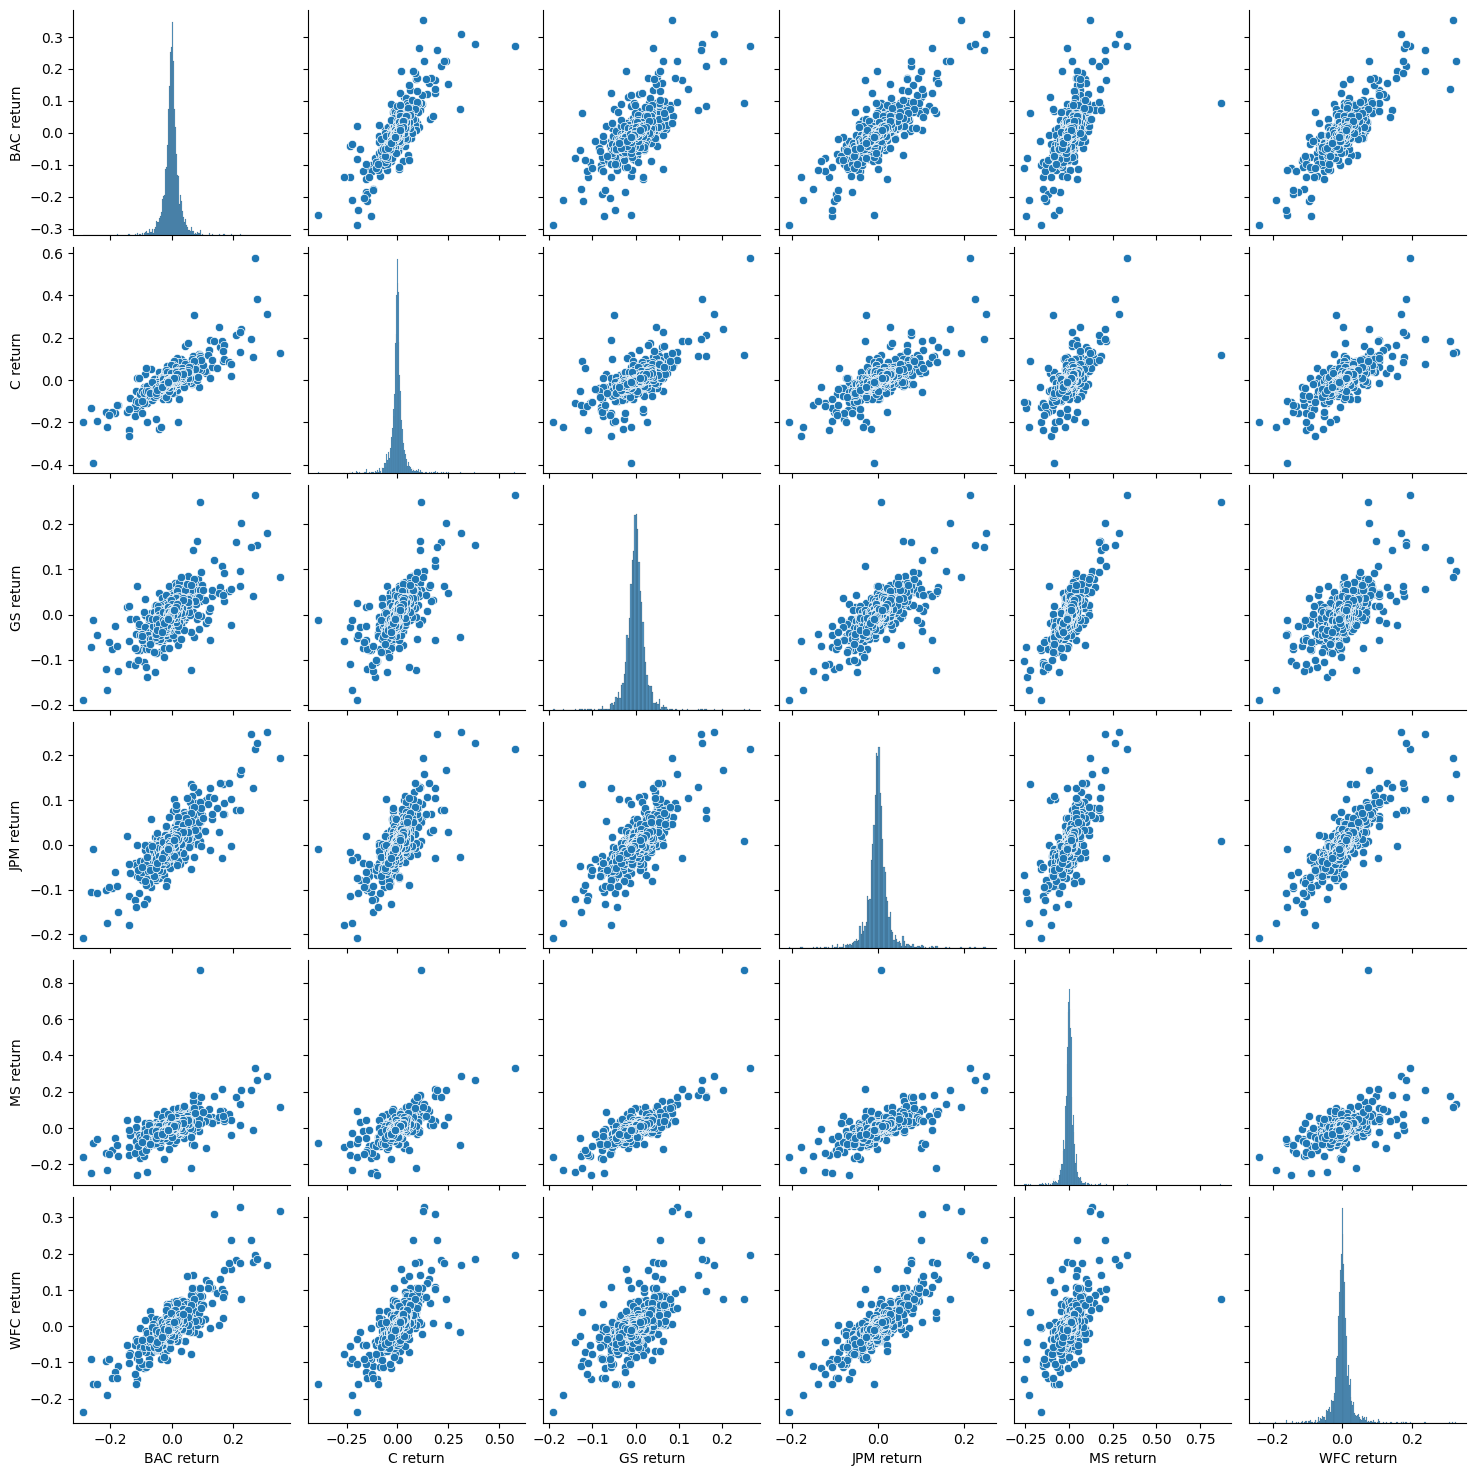

In [ ]:
sns.pairplot(return_t)

<Axes: xlabel='Bank Ticker', ylabel='Bank Ticker'>

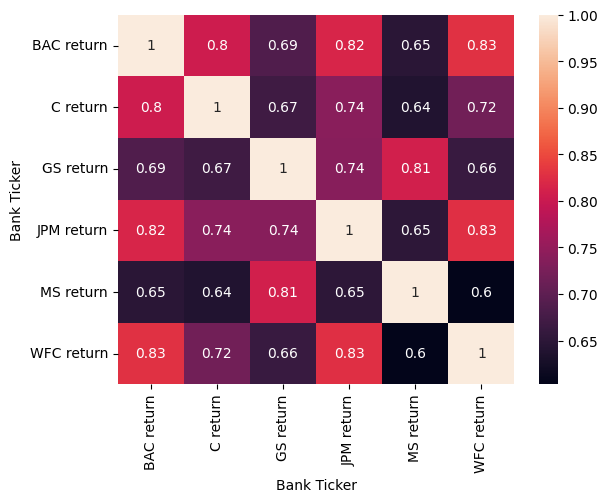

In [ ]:
sns.heatmap(return_t.corr(), annot=True)

## Insights:
* The stock returns for Citi group (C), JPMorgan Chase (JPM), and Wells Fargo (WFC) all have strong positive correlation with the returns of Bank of America (BAC)
* Goldman Sachs (GS) stock return is strongly and positively correlated with Morgan Stanley (MS) stock returns
* There exist a strong positive correlation with the stock returns of JPMorgan (JPM) and Well Fargo (WFC)

# What are the best and worst days of daily stock returns for each bank?
* Here we show the best/worst days alongside their stock returns
* Using the new 'return_t' dataframe

In [ ]:
# for the best days and its corresponding stock returns

return_t.idxmax()

,0
Bank Ticker,
BAC return,2009-04-09
C return,2008-11-24
GS return,2008-11-24
JPM return,2009-01-21
MS return,2008-10-13
WFC return,2008-07-16


In [ ]:
# to get the corresponding stock prices

return_t.max()

,0
Bank Ticker,
BAC return,0.352691
C return,0.578249
GS return,0.264678
JPM return,0.250968
MS return,0.869835
WFC return,0.327646


In [ ]:
# alternatively: showing both results simulataneously

bank_best = []

for bank in return_t.columns:
  best_day = return_t[bank].idxmax()
  best_stock_value = return_t[bank].max()

  bank_best.append({'Bank Ticker': bank,
                    'Best Day': best_day,
                    'Stock Value': best_stock_value})

bank_best_days = pd.DataFrame(bank_best)

bank_best_days.set_index('Bank Ticker', inplace=True)

bank_best_days

,Best Day,Stock Value
Bank Ticker,,
BAC return,2009-04-09,0.352691
C return,2008-11-24,0.578249
GS return,2008-11-24,0.264678
JPM return,2009-01-21,0.250968
MS return,2008-10-13,0.869835
WFC return,2008-07-16,0.327646


In [ ]:
## For Worst days

bank_worst = []

for bank in return_t.columns:
  worst_day = return_t[bank].idxmin()
  worst_stock_value = return_t[bank].min()

  bank_worst.append({'Bank Ticker': bank,
                    'Worst Day': worst_day,
                    'Stock Value': worst_stock_value})

bank_worst_days = pd.DataFrame(bank_worst)

bank_worst_days.set_index('Bank Ticker', inplace=True)

bank_worst_days

,Worst Day,Stock Value
Bank Ticker,,
BAC return,2009-01-20,-0.289694
C return,2009-02-27,-0.390244
GS return,2009-01-20,-0.189596
JPM return,2009-01-20,-0.207274
MS return,2008-10-09,-0.258929
WFC return,2009-01-20,-0.238223


## Insight
* Citigroup (C) had the both the best stock value and the worst stock value
* Wells Fargo had its maximum stock return in July 2008 and in April 2009, Bank of America was at it's all time high, other bank had theirs within that time frame
* All banks had their worst stock return days sometime in January/February 2009, except Morgan Stanley in August 2008

# Which Stock is the riskiest to buy over the time period?
* Here standard deviation (std) is employed
* Why std? Standard deviation is a statistical measure that quantifies the volatility or dispersion of returns, meaning how much an investment's price fluctuates from its average.

In [ ]:
return_t.std()

,0
Bank Ticker,
BAC return,0.036659
C return,0.038672
GS return,0.025386
JPM return,0.027675
MS return,0.037717
WFC return,0.030195


In [ ]:
# how about the volatility of a particular year only, say 2014?

stock_2014 = return_t.loc['2014-01-01' : '2014-12-31']

stock_2014.std()

,0
Bank Ticker,
BAC return,0.013629
C return,0.012872
GS return,0.010903
JPM return,0.011237
MS return,0.013635
WFC return,0.008849


## Insight
* Overtime (per this study period), the riskiest stock to buy would be that of `Citigroup`, since its price fluatuates the farthest from it's mean price
* If we consider a particular year, say 2014, in theory, Bank of America and Morgan Stanley, will have the most risk but overall, all the banks have equal risk of approximately 1%

<ipython-input-19-1882198081>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(stock_2014['MS return'])


<Axes: xlabel='MS return', ylabel='Density'>

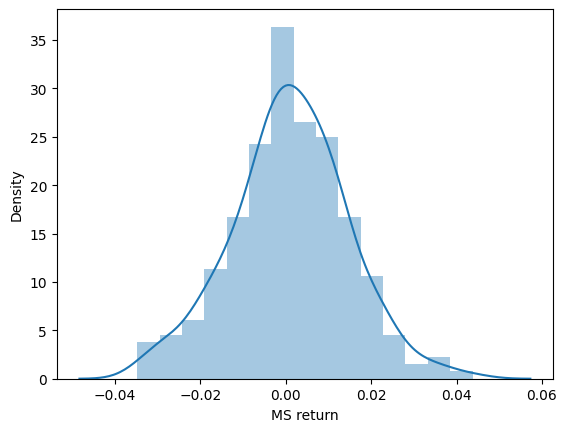

In [ ]:
# See what the 2014 stock return of Morgan Stanley looks like

sns.distplot(stock_2014['MS return'])

# Use diagram to show the Close price for the entire index of time, for each bank?
* Here, the .xs() method is employed to get a cross section of the data
* seaborn (sns) is used for the generic plot and plotly is used for the interactive (same) plot

<Axes: xlabel='Date'>

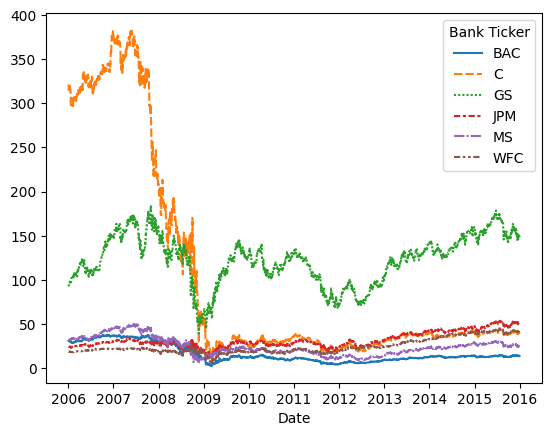

In [ ]:
original_data = bank_stocks.xs(key = 'Close',
               axis = 1,
               level = 'Stock Info')


sns.lineplot(original_data)

In [ ]:
# Use interactive plots

import plotly.express as px


fig = px.line(original_data)

fig.show()

# Use diagram to show a 30day moving average against the Close price for Citigroup stocks for 2009
* Moving average helps in smoothing out short-term fluctuations to reveal underlying trends
Moving averages represent historical closing prices and do not necessarily predict future price performance
* By examining this plot, you can identify the direction of the trend and potential trend reversals

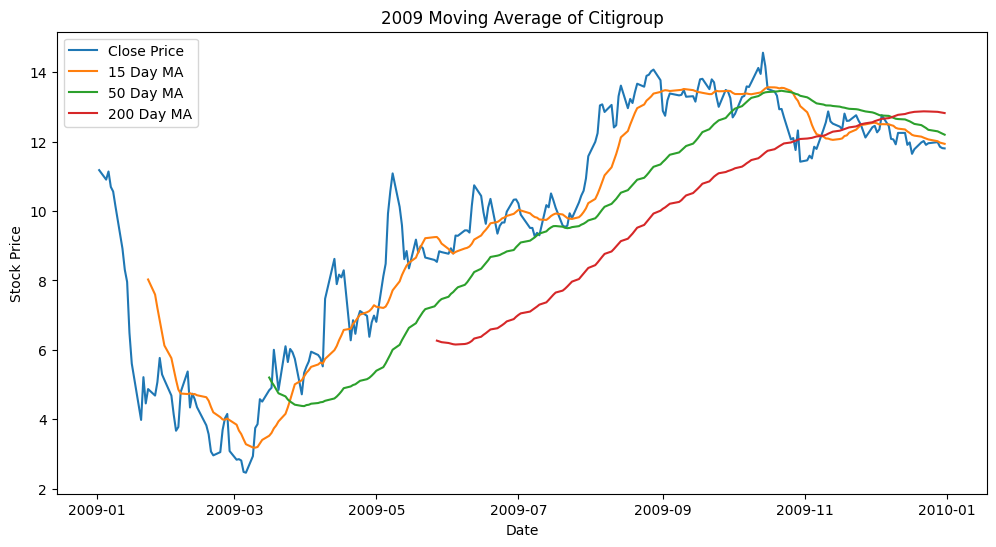

In [ ]:
# get the data
citi_2009 = Close['BAC']['2009']

citi_2009_movingAverage_A = citi_2009.rolling(window = 15).mean()
citi_2009_movingAverage_B = citi_2009.rolling(window = 50).mean()
citi_2009_movingAverage_C = citi_2009.rolling(window = 100).mean()

# plot the data

plt.figure(figsize=(12,6))
plt.plot(citi_2009)
plt.plot(citi_2009_movingAverage_A)
plt.plot(citi_2009_movingAverage_B)
plt.plot(citi_2009_movingAverage_C)
plt.legend(['Close Price', '15 Day MA', '50 Day MA', '200 Day MA'])
plt.title('2009 Moving Average of Citigroup')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.show()

## Insights
* The `15-day moving average` quickly responds to price changes because each value has a greater weighting in the calculation due to the relatively short time horizon vs. `50- and 200- day` which is slower to adjust to price changes because it uses more data points in its calculation
* Using a 50-day and 200-day moving average represents trading signals in the market
* Typically, the cross of a stock's 50-day above its 200-day moving average is `a major signal` that the stock has begun an uptrend. The 50-day moving average for Citi group crossed above its 200-day in June of 2009
* Conversely, the 50-day moving average went below the 200-day in December 2009. `This signals` a new downtrend and it is referred to as the [death cross](https://www.investopedia.com/terms/d/deathcross.asp#:~:text=recent%20price%20weakness.-,What%20Is%20a%20Death%20Cross%3F,-The%20%22death%20cross).

#### Further Insight:
* `Support` is established when a price is trending downward. The selling pressure subsides, buyers are willing to step in, and a floor is established. * `Resistance` happens when a price is trending upward. The buying strength diminishes, and the sellers step in, creating a ceiling.
* In either case, a `moving average may signal an early support or resistance level`.

* `For example`, if a stock is drifting lower in an established uptrend, it wouldn't be surprising to see the stock find support at a long-term 200-day moving average.